In [2]:
using ApproxFun

# Laplace Equation $u_{xx} + u_{yy} = 0$, $u|_{\partial d} = \Re(e^{x+i y})$

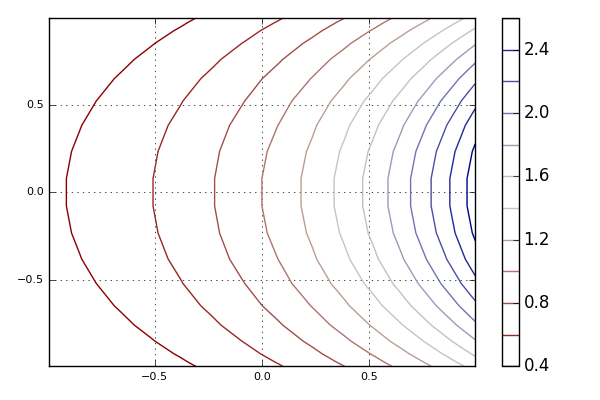

In [12]:
d=Interval()^2
g=Fun(z->real(exp(z)),∂(d))  # boundary data
u=[dirichlet(d);lap(d)]\g
ApproxFun.contour(u)

we solve with neumann on one edge
`ldirichlet/rdirichlet/lneumann/rneumann` commands specify left/right dirichet/neumann boundary conditions

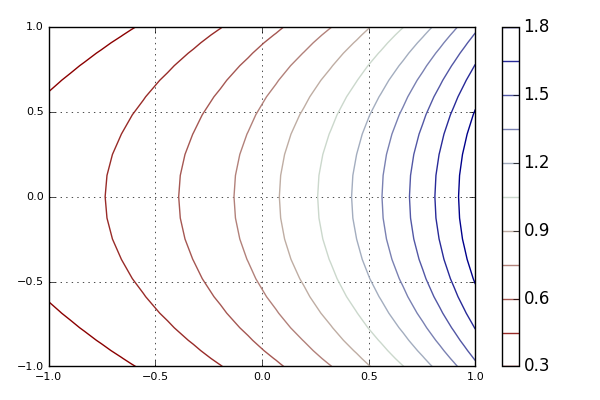

In [13]:
dx=dy=Interval()
d=dx*dy
x=Fun(identity,dx);y=Fun(identity,dy)


g=[real(exp(-1+1im*y)),0.0,
    real(exp(x-1im)),real(exp(x+1im))]

u=[ldirichlet(dx)⊗I;rneumann(dx)⊗I;I⊗dirichlet(dy);lap(d)]\g;
ApproxFun.contour(u)

# Poisson equation $u_{xx} + u_{yy} = f(x,y)$

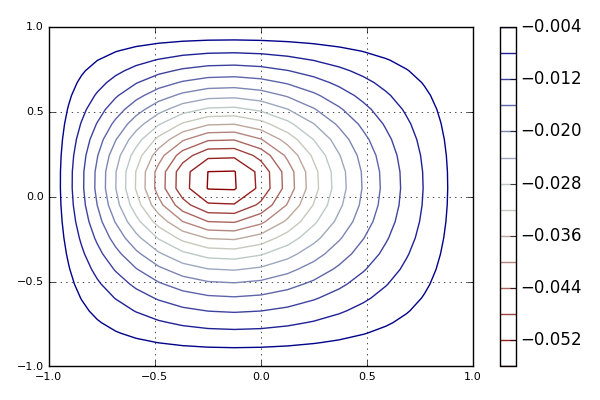

In [5]:
f=Fun((x,y)->exp(-10(x+.2)^2-20(y-.1)^2))  #default is [-1,1]^2
d=domain(f)
u=[dirichlet(d);lap(d)]\[zeros(∂(d));f]
ApproxFun.contour(u)

# Helmholtz $u_{xx} + u_{yy} + 100u=0, u|_{\partial d}=1$

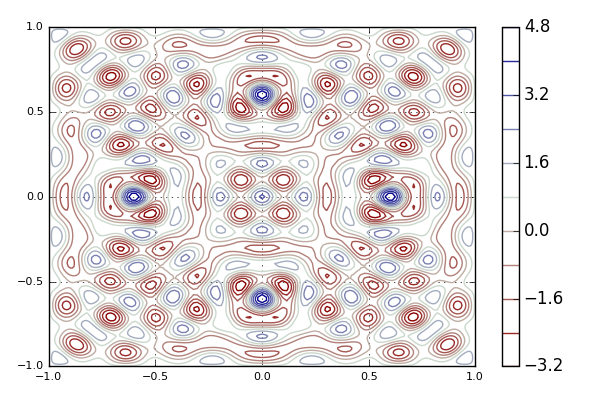

In [6]:
d=Interval()^2

u=[dirichlet(d);lap(d)+1000I]\ones(∂(d))
ApproxFun.contour(u)

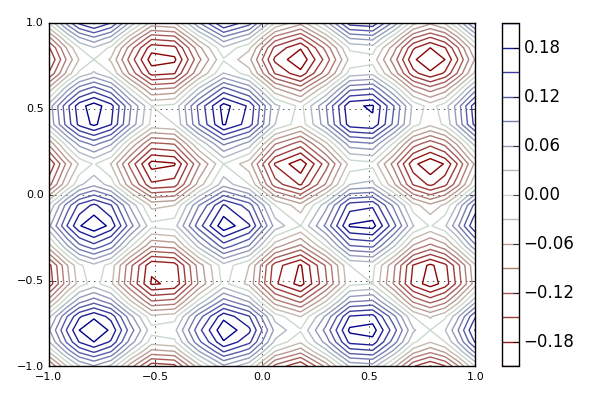

In [7]:
d=Interval()^2

u=[neumann(d);lap(d)+100I]\ones(∂(d))
ApproxFun.contour(u)

# Screened Poisson  $u_{xx} + u_{yy} - 100u = 0, \partial u(\partial d) = 1$

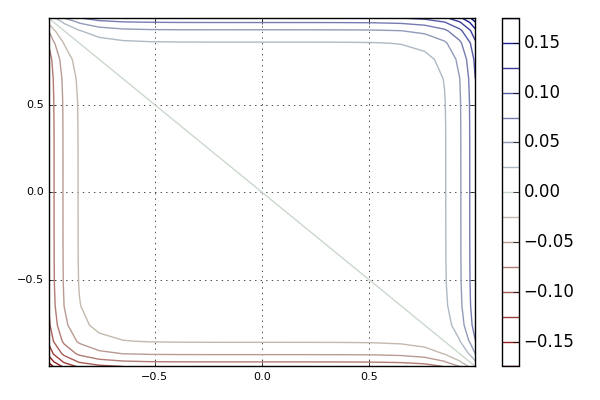

In [8]:
d=Interval()^2
u=[neumann(d);lap(d)-100.0I]\ones(∂(d))
ApproxFun.contour(u)

# Convection $u_t + u_x = 0,u(x,0)=e^{-20x^2}, u(-1,t) = 0$

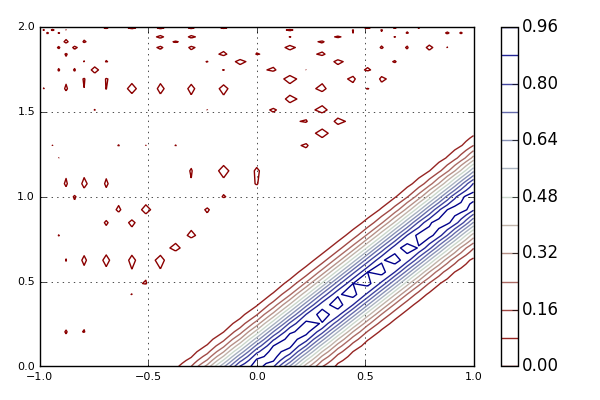

In [9]:
dx=Interval();dt=Interval(0,2.)
d=dx*dt
Dx=Derivative(d,1);Dt=Derivative(d,2)
u=[I⊗ldirichlet(dt);ldirichlet(dx)⊗I;Dt+Dx]\Fun(x->exp(-20x^2),dx)
ApproxFun.contour(u)

## Piecewise PDE $$u_t+\begin{cases} 0.5 & 0≤x≤0.5\cr                     1 & \hbox{otherwise}\end{cases} u_{xx}$$

We can solve on piecewise domains. Here is convection with two different speeds, imposing continuity at the singularities.

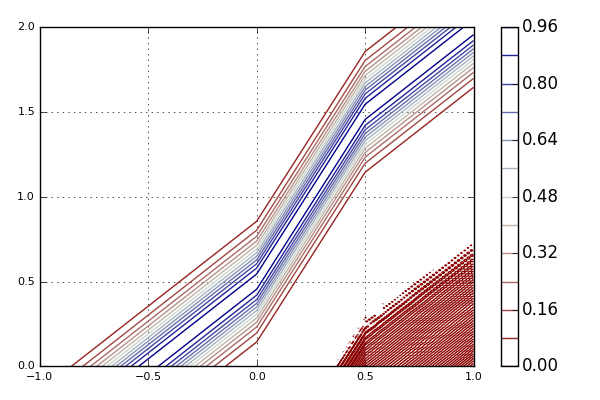

In [10]:
a=Fun([1,0.5,1],[-1.,0.,0.5,1.])
s=space(a)
dt=Interval(0,2.)
Dx=Derivative(s);Dt=Derivative(dt)
Bx=[ldirichlet(s);continuity(s,0)]
u=pdesolve([I⊗ldirichlet(dt);Bx⊗I;I⊗Dt+(a*Dx)⊗I],Any[Fun(x->exp(-20(x+0.5)^2),s)],200)

ApproxFun.contour(u)

# Convection $u_t - x u_x = 0, u(x,0)=e^{-20x^2}, u(-1,t)=u(1,t)=0$

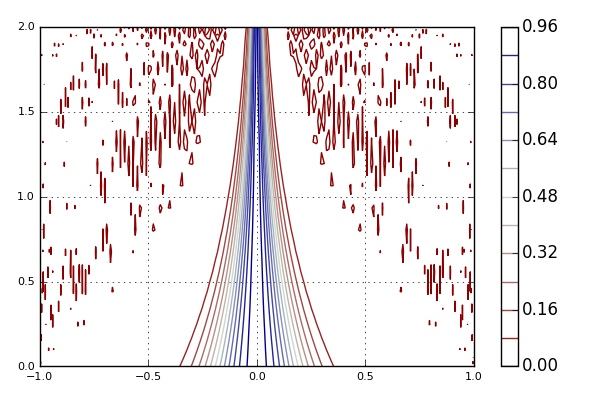

In [11]:
dx=Interval();dt=Interval(0,2.)
d=dx*dt
Dx=Derivative(d,1);Dt=Derivative(d,2)
x=Fun(identity,dx)

#timedirichlet is [u[x,0], u[-1,t], u[1,t]

u=[timedirichlet(d);Dt-x*Dx]\Fun(x->exp(-20x^2),dx)
ApproxFun.contour(u)

# Convection $u_t + x u_x = 0, u(x,0)=e^{-20x^2}$

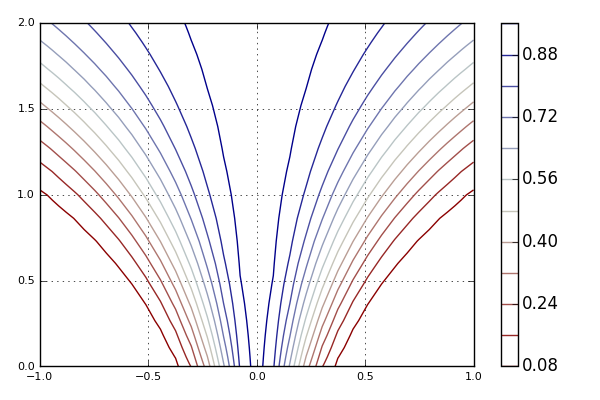

In [11]:
dx=Interval();dt=Interval(0,2.)
d=dx*dt
Dx=Derivative(d,1);Dt=Derivative(d,2)
x=Fun(identity,dx)
u=[I⊗ldirichlet(dt);Dt+x*Dx]\Fun(x->exp(-20x^2),dx)
ApproxFun.contour(u)

# Convection diffusion $u_t = \epsilon u_{xx} + (2+x) u_x, u(x,0)=e^{-20x^2}, u(-1,t)=u(1,t) = 0$

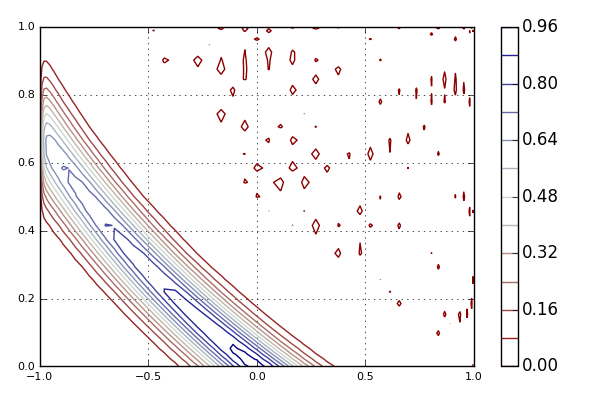

In [12]:
dx=Interval();dt=Interval(0,1.)
d=dx*dt
ε=.01
Dx=Derivative(d,1);Dt=Derivative(d,2)
x=Fun(identity,dx)
V=2.0+x
# Parentheses are a hack to get rank 2 PDE
u=[timedirichlet(d);Dt-ε*Dx^2-V*Dx]\Fun(x->exp(-20x^2),dx)

ApproxFun.contour(u)

# Wave equation with left Dirichlet and right Neumann $u_{tt} = u_{xx}, u(x,0)=e^{-20(x-.1)^2},u_t(x,0)=0,u(-1,t)=0,u_x(1,t)=0$

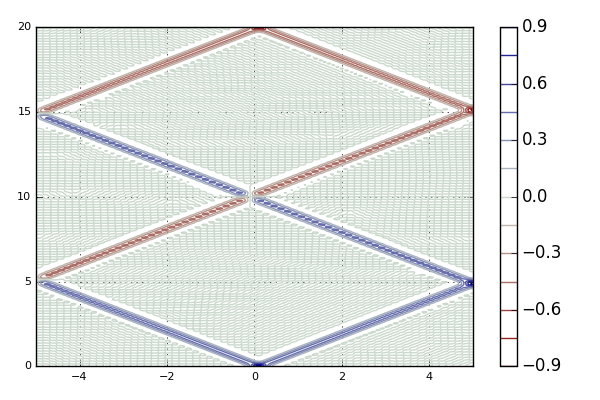

In [13]:
dx=Interval(-5.,5.);dt=Interval(0,20.)
d=dx*dt
Dx=Derivative(d,1);Dt=Derivative(d,2)
# need to specify both ic and its derivative
B=[I⊗ldirichlet(dt),I⊗lneumann(dt),ldirichlet(dx)⊗I,rneumann(dx)⊗I]
u=pdesolve([B;Dt^2-Dx^2],Fun(x->exp(-20(x-.1)^2),dx),200)


ApproxFun.contour(u)

# Linear KdV Dirichlet $u_t + u_{xxx} = 0, u(x,0)=e^{-10x^2},u(-1,t)=u(1,t)=u_x(1,t)=0$

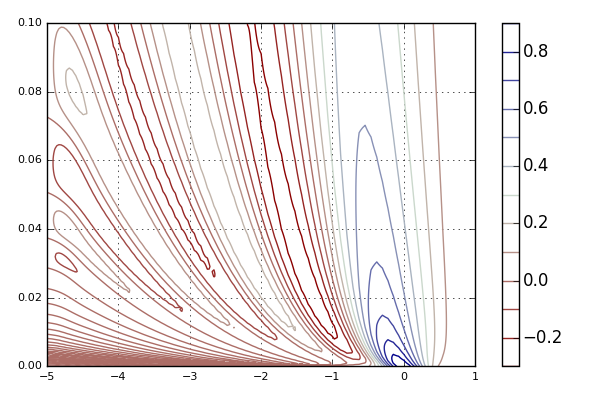

In [14]:
dx=Interval(-5.0,1.);dt=Interval(0,.1);
d=dx*dt
Dx=Derivative(d,1);Dt=Derivative(d,2)
B=[timedirichlet(d);rneumann(dx)⊗I]
u=pdesolve([B;Dt+Dx^3],Fun(x->exp(-10x^2),dx),200)
ApproxFun.contour(u)

## Linear KdV Neumann $u_t + u_{xxx} = 0, u(x,0)=e^{-10x^2},u_x(-1,t)=u(1,t)=u_x(1,t)=0$

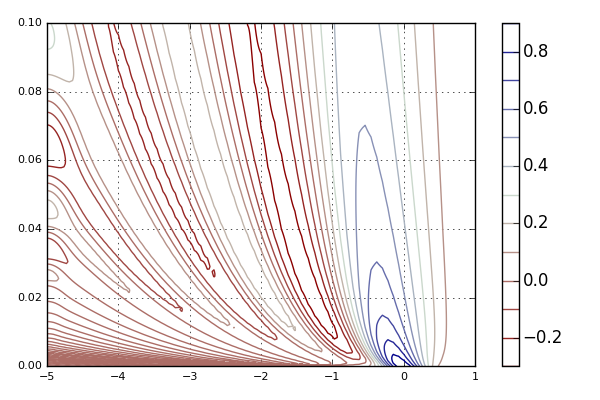

In [15]:
dx=Interval(-5.0,1.);dt=Interval(0,.1);
d=dx*dt
Dx=Derivative(d,1);Dt=Derivative(d,2)
B=[I⊗ldirichlet(dt);neumann(dx)⊗I;rdirichlet(dx)⊗I]
u=pdesolve([B;Dt+Dx^3],Fun(x->exp(-10x^2),dx),200)
ApproxFun.contour(u)

# Beamer equation $u_{tt} + u_{xxxx} = 0, u(x,0)=e^{-200(x-1/2)^2}, u_t(x,0)=u(\pm,t)=u_x(\pm 1,t) = 0$

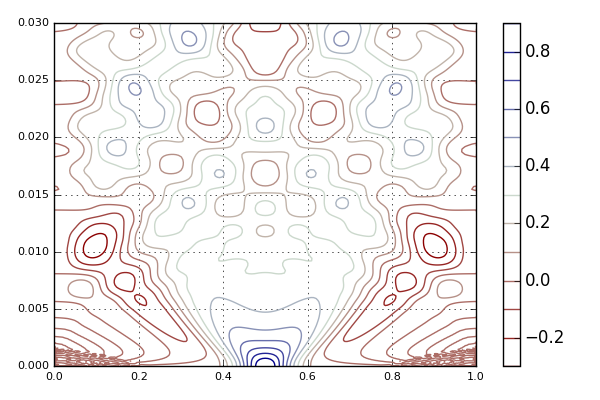

In [16]:
dx=Interval(0.0,1.0);dt=Interval(0,0.03)
d=dx*dt
Dx=Derivative(d,1);Dt=Derivative(d,2);
x=Fun(identity,dx)


u=pdesolve([timedirichlet(d);I⊗lneumann(dt);neumann(dx)⊗I;Dt^2+Dx^4],exp(-200(x-.5)^2),200)
ApproxFun.contour(u)

# Quadratic laplacian $u_{xxxx} + u_{yyyy} = 0$

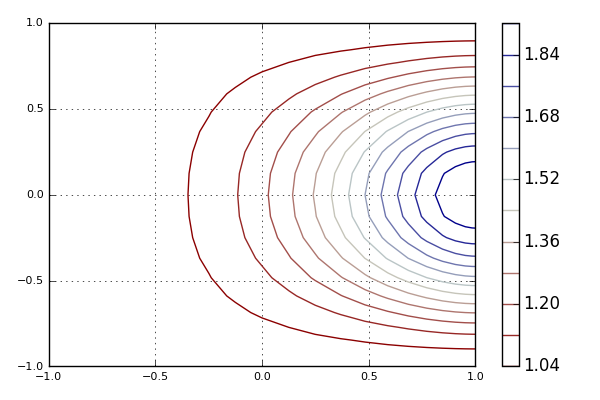

In [17]:
d=Interval()^2

Dx=Derivative(d,1);Dy=Derivative(d,2);

y=Fun(identity,d[2])

u=[dirichlet(d);neumann(d);Dx^4+Dy^4]\[1.,(y^2-1)^2+1,1.,1.]
ApproxFun.contour(u)

# Schrödinger Dirichlet $i \epsilon u_t + .5 \epsilon^2 u_{xx} = x^2 u, u(x,0)=e^{-25(x-.5)^2}e^{-i/(5ϵ)log(2cosh(5(x-.5)))}$

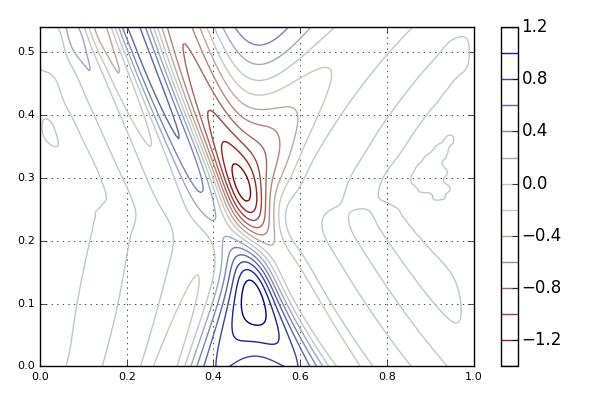

In [18]:
dx=Interval(0.,1.);dt=Interval(0.0,0.54)
d=dx*dt

ϵ=0.0256
u0=Fun(x->exp(-25*(x-.5)^2)*exp(-1.im/(5*ϵ)*log(2cosh(5*(x-.5)))),dx)
V=Fun(x->x^2,dx)

Dt=Derivative(d,2);Dx=Derivative(d,1)

L=1im*ϵ*Dt+.5*ϵ^2*Dx^2-V⊗1

u=pdesolve([timedirichlet(d);L],u0,300)
ApproxFun.contour(real(u))